In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Plt stye
plt.style.use("fivethirtyeight")

# Data Frame
df = pd.read_csv(r"D:\Python Course\Exercise Pt3\csv\car_data.csv")

In [140]:
# First 10 data
first10 = df.head(10)
first10

,CarID,Brand,Model,Year,Price,Mileage,FuelType,Transmission,Region
0,C001,Mitsubishi,Outlander,2021,23795,131932,Electric,Manual,Bandung
1,C002,Hyundai,i20,2022,52732,54886,Petrol,Automatic,Bandung
2,C003,BMW,X3,2017,45194,87498,Diesel,Automatic,Makassar
3,C004,BMW,X5,2022,68788,16023,Electric,Manual,Medan
4,C005,Honda,Accord,2017,9685,64820,Electric,Automatic,Denpasar
5,C006,BMW,3 Series,2016,67735,64925,Hybrid,Automatic,Medan
6,C007,Mitsubishi,Pajero,2020,10433,5311,Diesel,Automatic,Denpasar
7,C008,Suzuki,Baleno,2019,25568,85305,Petrol,Manual,Makassar
8,C009,Hyundai,Elantra,2020,14396,130608,Diesel,Automatic,Bandung
9,C010,Tesla,Model S,2017,9899,56886,Hybrid,Automatic,Denpasar


In [141]:
# Show Cars Price > 30000 & < 10000 mileage
carsDat1 = df[["CarID","Brand", "Model","Year","FuelType","Transmission"]][(df["Price"] > 30000 ) & (df["Mileage"] < 10000)]

carsDat1

,CarID,Brand,Model,Year,FuelType,Transmission
19,C020,Tesla,Model 3,2018,Petrol,Manual
47,C048,BMW,X5,2023,Hybrid,Manual
53,C054,Suzuki,Swift,2023,Diesel,Manual
83,C084,Mitsubishi,Outlander,2021,Petrol,Automatic
88,C089,Toyota,Camry,2015,Petrol,Automatic


In [142]:
# Show all car brands (unique)
brands = df["Brand"].unique()
print(brands)

['Mitsubishi' 'Hyundai' 'BMW' 'Honda' 'Suzuki' 'Tesla' 'Toyota']


In [143]:
# Count Cars for each fuel type
carFuelType = df["FuelType"].value_counts()
carFuelType

FuelType
Hybrid      35
Diesel      25
Petrol      22
Electric    18
Name: count, dtype: int64

In [144]:
# top5 expenive cars on data
top5 = df.sort_values(by="Price" ,ascending=False).head(5)
top5


,CarID,Brand,Model,Year,Price,Mileage,FuelType,Transmission,Region
93,C094,Suzuki,Ertiga,2017,69135,50108,Petrol,Manual,Surabaya
56,C057,Suzuki,Baleno,2020,69087,68840,Electric,Manual,Medan
3,C004,BMW,X5,2022,68788,16023,Electric,Manual,Medan
86,C087,Honda,Civic,2020,68535,59040,Petrol,Automatic,Medan
60,C061,Honda,Accord,2015,68343,93264,Petrol,Manual,Medan


In [145]:
# Avg price per Brand (High - Low)
avgBrand = round(df.groupby("Brand")["Price"].mean().sort_values(ascending=False), 2)
avgBrand

Brand
Hyundai       46746.15
BMW           45076.50
Honda         43355.00
Suzuki        41031.84
Toyota        38021.14
Tesla         33631.08
Mitsubishi    33348.64
Name: Price, dtype: float64

In [197]:
# Common Car Mode Sold
ommModel = df["Model"].value_counts()
print(ommModel.head(1))

Model
Camry    10
Name: count, dtype: int64


In [147]:
# Count Car Sold w/ Manual Transmission
manual =(df["Transmission"] == "Manual").sum()
print(manual)

50


In [148]:
# Electric Car Sold in Bandung
elBandung = df[(df["FuelType"] == "Electric") & (df["Region"] == "Bandung")]
elBandung

,CarID,Brand,Model,Year,Price,Mileage,FuelType,Transmission,Region
0,C001,Mitsubishi,Outlander,2021,23795,131932,Electric,Manual,Bandung
20,C021,Toyota,Camry,2016,14873,37065,Electric,Manual,Bandung


In [149]:
# Count Sold per Region
soldReg = df["Region"].value_counts()
soldReg

Region
Bandung     23
Makassar    20
Medan       19
Denpasar    14
Jakarta     13
Surabaya    11
Name: count, dtype: int64

In [150]:
# Oldest Car Sold (Year)
df.sort_values(by="Year", ascending=True).head(1)

,CarID,Brand,Model,Year,Price,Mileage,FuelType,Transmission,Region
28,C029,Hyundai,Kona,2015,56984,40774,Diesel,Manual,Jakarta


In [151]:
# Create New Column for CarAge (based 2025)
age = 2025 - df["Year"]
df.insert(6, "CarAge", age)

In [152]:
# Average Mileage by Transmission
avgmile = df.groupby("Transmission")["Mileage"].mean().sort_values(ascending=False)
avgmile

Transmission
Automatic    71462.24
Manual       67445.68
Name: Mileage, dtype: float64

In [217]:
# Top 5 Cheapest Car each Brand
cheapCar = df.groupby("Brand")["Price"].min().sort_values(ascending=True)
cheapCar.head(5)

Brand
Hyundai        8854
Mitsubishi     9585
Honda          9685
Tesla          9802
Suzuki        11556
Name: Price, dtype: int64

In [154]:
# Total Revenue Car Sold in Jakarta
JktRev = (df["Price"][df["Region"] == "Jakarta"].sum())
print(JktRev)

424739


In [155]:
# df.to_csv(r"D:\Python Course\Exercise Pt3\csv\newCarData.csv", index=False)

Text(0, 0.5, 'Brands')

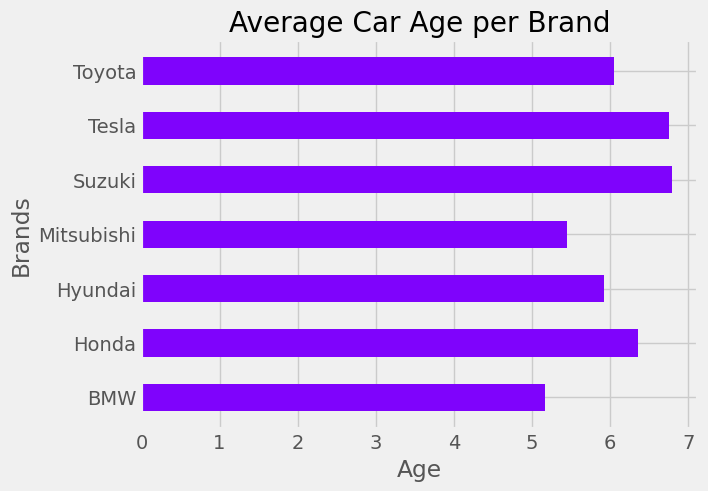

In [191]:
# Avg Car Age per Brand Chart
avgCarAge = round(df.groupby("Brand")["CarAge"].mean(), 2)

# plt.figure(figsize=(10, 8))
plt.barh(avgCarAge.index, avgCarAge.values, color="#7f03fc", height=0.5)
plt.title("Average Car Age per Brand")
plt.xlabel("Age")
plt.ylabel("Brands")

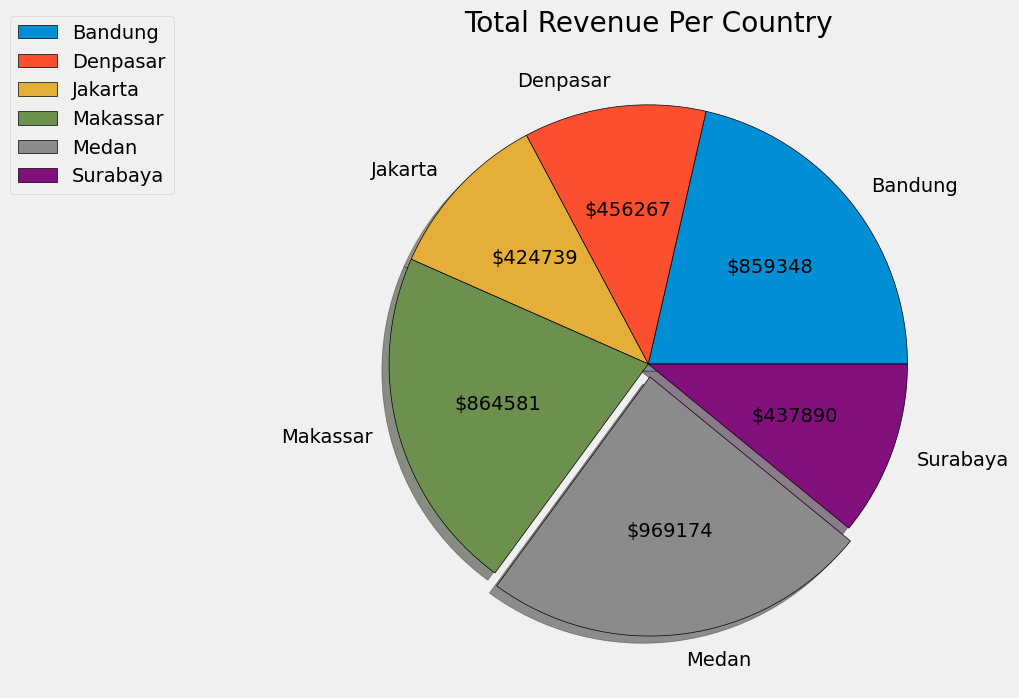

In [188]:
# Total Revenue per Region Pie Chart
revReg = round(df.groupby("Region")["Price"].sum(), 2)
explodes = [0, 0, 0, 0, 0.05, 0]
plt.figure(figsize=(10, 8))
plt.pie(revReg.values, labels=revReg.index, wedgeprops={'edgecolor':'black'}, shadow=True, autopct=lambda pct:f"${int(pct/100.*sum(revReg.values))}", explode=explodes)
plt.title("Total Revenue Per Country")
plt.legend(loc="center left", bbox_to_anchor=(-0.5, 0.9))

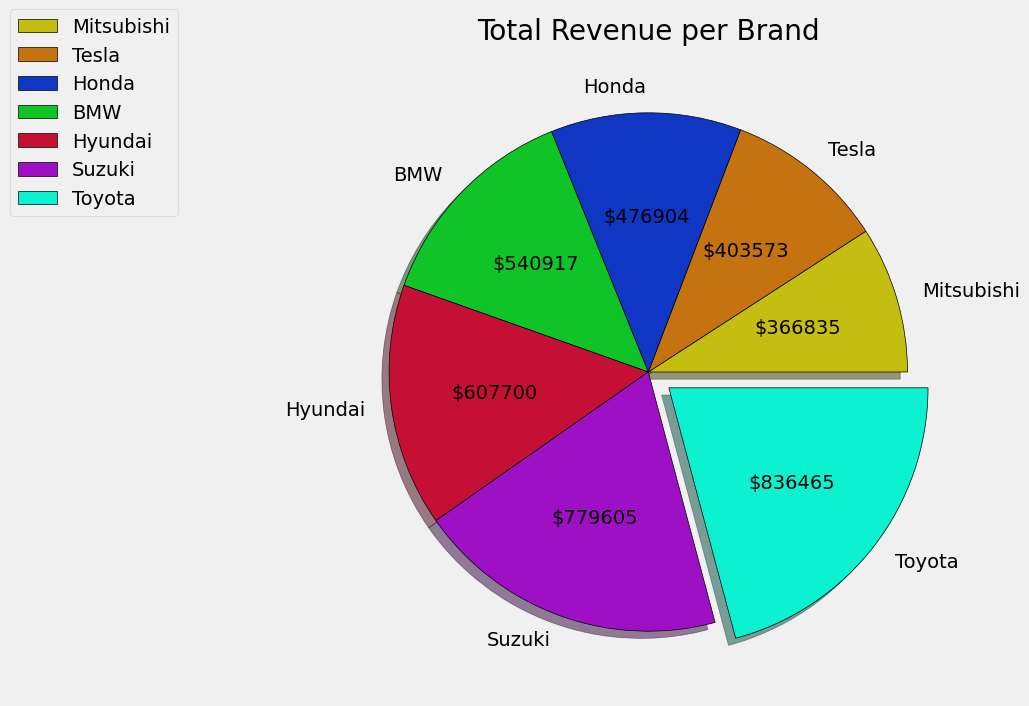

In [243]:
# Total Revenue per Brand (High - Low)
revBrand = df.groupby("Brand")["Price"].sum().sort_values(ascending=True)
colorss = ["#c4be10", "#c47310", "#1037c4", "#10c428", "#c41034", "#9d10c4", "#0cf2d0"]
explodess = [0, 0, 0, 0, 0, 0, 0.1]


plt.figure(figsize=(10, 8))
plt.pie(revBrand.values, labels= revBrand.index, explode=explodess,wedgeprops={'edgecolor':'black'}, colors=colorss, shadow=True, autopct=lambda pct:f"${int(pct/100.*sum(revBrand.values))}")
plt.title("Total Revenue per Brand")
plt.legend(loc="center left", bbox_to_anchor=(-0.5, 0.9))


Text(0, 0.5, 'Models')

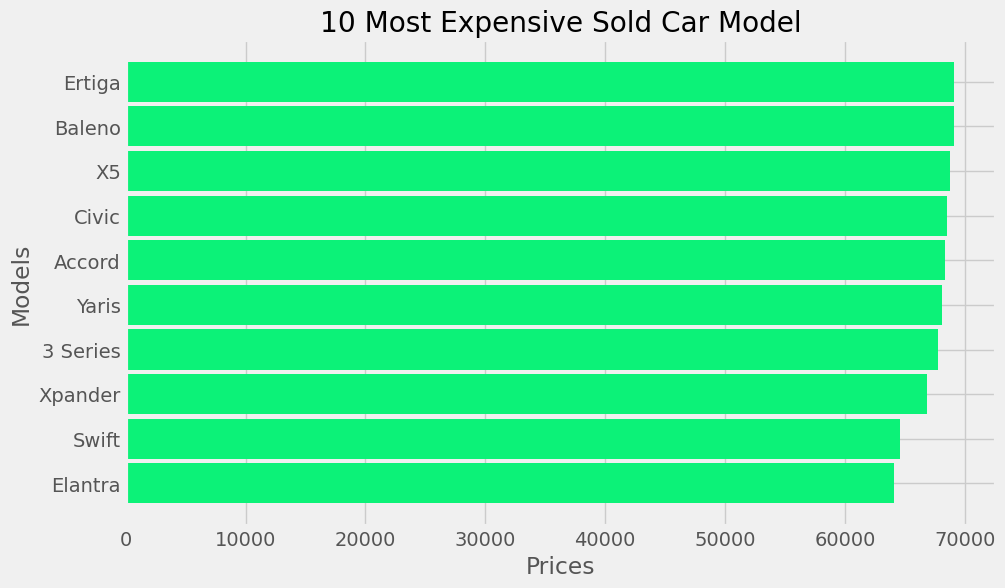

In [274]:
# 10 Most Expensive Car Model
expModel = df.groupby("Model")["Price"].max().sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 6))
plt.barh(expModel.index, expModel.values, color="#0cf278", height=0.9)
plt.title("10 Most Expensive Sold Car Model")
plt.xlabel("Prices")
plt.ylabel("Models")